<!DOCTYPE html>
<html>
<head>
<style>
    .header-banner {
        background-color: white;
        color: black; 
        padding: 1rem; 
        font-family: 'Nunito', sans-serif;
    }
    .header-content {
        max-width: 2000px;
        margin: 0 auto;
        display: flex;
        align-items: center;
        gap: 2rem;
    }
    .logo {
        max-width: 160px;
    }
    .text-content {
        flex: 1;
    }
    .text-content h1 {
        font-size: 34px;
        margin: 0 0 10px;
        font-weight: 700;
        color: #7e4d02ff;
        border-bottom: 2px solid #e5c120ff;
        padding-bottom: 10px;
    }
    .text-content h2 {
        font-size: 21px;
        margin: 0 0 5px;
        font-weight: 600;
        color: #222;
    }
    .member-list {
        display: grid;
        grid-template-columns: repeat(2, auto);
        gap: 6px 40px;
        font-size: 17px;
        color: #444;
    }
    .member {
        position: relative;
        padding-left: 20px;
    }
</style>
<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Nunito:wght@400;700&display=swap" rel="stylesheet">
</head>
<body>

<header class="header-banner">
    <div class="header-content">
        <img src="https://i.ibb.co/JBPWVYR/Logo-Nova-IMS-Black.png" alt="NOVA IMS Logo" class="logo">
        <div class="text-content">
            <h1>Cars 4 You: Expediting Car Evaluations with ML</h1>
            <h2>Group 37</h2>
            <div class="member-list">
                <div class="member">Filipa Pereira, 20240509</div>
                <div class="member">Gonçalo Silva, 20250354</div>
                <div class="member">Marta La Feria, 20211051 </div>
                <div class="member">Tomás Coroa, 20250394 </div>
            </div>
        </div>
    </div>
</header>

</body>
</html>

<div style="background-color:#f0f8ff; border-left:5px solid #1e90ffff; padding:12px 18px; border-radius:8px; font-family:sans-serif; font-size:14px; line-height:1.4; width:fit-content;">
<b style="color:#104e8b;"> FALTA:</b><br>

- SABER SE É CORR. SPEARMAN TB PARA AS CATEGÓRICAS <br>
- VER A QUESTÃO DO OHE EM KNN <br>
- Ter o textos todos acabados
- Imports só os necessários <br>
- PORQUÊ QUE TRANSMISSION OTHER ESTÁ ASSIM COM CORR=0? E O QUE É BRAND_NONE<br>

</div>

### Import Libraries

In [81]:
### APAGAR ### DEIXAR SÓ O QUE É PRECISO
import pandas as pd
import numpy as np

# Feature Selection- Filter Methods
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from itertools import combinations

# For plots
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.base import clone


from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import Lasso

import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE

### Load Data

In [82]:
# Load the processed datasets (train, validation, test)
X_train = pd.read_parquet("./project_data/X_train_final.parquet", engine="pyarrow")
X_val   = pd.read_parquet("./project_data/X_val_final.parquet",   engine="pyarrow")
X_test  = pd.read_parquet("./project_data/X_test_final.parquet",  engine="pyarrow")

y_train = pd.read_parquet("./project_data/y_train.parquet", engine="pyarrow").squeeze("columns")
y_val   = pd.read_parquet("./project_data/y_val.parquet",   engine="pyarrow").squeeze("columns")


# Check the shape of the training, validation and test data
print(X_train.shape, X_val.shape, X_test.shape)
print('\n',y_train.shape, y_val.shape)

(60764, 20) (15190, 20) (32567, 20)

 (60764,) (15190,)


In [83]:
X_train

,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage,age,miles_per_year,Brand_freq_enc,brand_model_freq_enc,transmission_manual,transmission_other,transmission_semi auto,transmission_unknown,fuelType_electric,fuelType_hybrid,fuelType_other,fuelType_petrol,fuelType_unknown
0,0.138512,0.833333,-0.375796,0.500,-0.671501,0.0,0.0,0.333333,-0.159831,1.322244,-0.240758,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0
1,0.395812,-3.416667,0.341401,-0.750,-0.700073,0.0,0.0,0.000000,0.452177,1.322244,2.074399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.614799,0.000000,-0.375796,-0.625,0.242784,0.0,0.0,-0.666667,-0.855755,1.322244,1.164510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.679600,0.000000,-0.267516,-0.125,-0.557216,0.5,0.0,-0.666667,-1.041335,-0.243586,-0.451941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
4,-0.620509,0.000000,-0.019108,0.000,-0.385787,0.0,0.0,-0.666667,-0.872109,0.306174,1.477819,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60759,-0.707950,0.208333,-1.388535,0.500,0.585641,-1.0,0.0,-0.666667,-1.122526,0.000000,0.712569,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
60760,0.895873,0.000000,-0.477707,-0.250,0.928499,1.0,0.0,0.666667,0.400775,1.322244,-0.398336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60761,0.880118,-5.208333,0.808917,0.500,-0.928644,-0.5,0.0,0.333333,0.689708,0.000000,0.712569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
60762,0.663481,-0.833333,0.350318,0.500,0.414213,0.5,0.0,0.666667,0.178930,1.322244,0.066543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0


In [84]:
X_val

,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage,age,miles_per_year,Brand_freq_enc,brand_model_freq_enc,transmission_manual,transmission_other,transmission_semi auto,transmission_unknown,fuelType_electric,fuelType_hybrid,fuelType_other,fuelType_petrol,fuelType_unknown
0,-0.271313,-0.083333,0.121019,0.625000,0.814213,0.0,0.0,0.000000,-0.503095,0.306174,-0.332717,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
1,-0.406140,0.000000,-1.407643,-0.250000,0.014213,-1.0,0.0,-0.666667,-0.258188,0.000000,-0.424677,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.247985,0.000000,-0.477707,0.500000,-0.128644,0.5,0.0,0.000000,-0.469691,0.306174,1.477819,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.317160,-4.791667,0.191083,-0.500000,-0.071501,-1.0,0.0,0.666667,-0.151673,-1.618551,-0.224584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.707950,0.000000,-0.019108,-0.500000,-0.871501,0.0,0.0,-0.666667,-1.122526,-0.243586,0.209335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15185,-0.023166,2.291667,-0.872611,0.500000,-0.414359,-1.0,0.0,0.333333,-0.345039,-0.693826,-0.011091,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15186,0.052084,-2.208333,0.714650,-0.750000,-0.385787,0.0,0.0,0.000000,-0.040016,1.322244,2.074399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15187,-0.709975,0.000000,-0.318471,-0.750000,-0.528644,1.0,0.0,-0.666667,-1.128326,-1.618551,-0.224584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15188,-0.448828,0.000000,-0.267516,-1.806838,0.728499,0.0,0.0,-0.666667,-0.380439,-0.693826,-0.313771,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0


In [85]:
X_test

,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage,age,miles_per_year,Brand_freq_enc,brand_model_freq_enc,transmission_manual,transmission_other,transmission_semi auto,transmission_unknown,fuelType_electric,fuelType_hybrid,fuelType_other,fuelType_petrol,fuelType_unknown
0,0.531368,2.500000,-0.834395,0.000,-0.100073,0.5,0.0,-1.000000,5.987502,-1.618551,-0.348429,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.239750,0.208333,-1.044586,0.500,-0.128644,0.0,0.0,0.000000,1.660630,0.000000,-0.039741,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.778097,-0.833333,-0.203822,-0.125,0.842784,0.0,0.0,0.333333,0.572839,-0.691006,-0.169131,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.487911,0.000000,-0.668790,-0.500,0.357070,-0.5,0.0,-0.666667,-0.492367,-0.243586,-0.344732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.345146,0.208333,-0.203822,0.500,-0.557216,1.0,0.0,-0.666667,-0.083511,-0.691006,0.004621,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32562,0.404803,0.000000,-0.528662,-0.250,0.842784,-0.5,0.0,0.000000,0.465052,0.000000,-0.039741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32563,-0.631809,0.000000,-1.312102,0.500,-0.728644,0.5,0.0,-1.000000,-0.674815,-0.691006,-0.421442,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32564,-0.375967,0.000000,-1.044586,0.500,0.671356,1.0,0.0,-0.666667,-0.171777,-0.693826,-0.269871,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0
32565,1.343615,0.000000,-1.662420,-0.375,0.471356,-0.5,0.0,-0.666667,4.752841,0.306174,0.146950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.11 | Feature Selection</b></span>
    </h1>
</div>

We applied several Feature Selection techniques (including *Filter Methods*, *Wrapper Methods*, and *Embedded Methods*) to identify and remove **irrelevant** or **highly correlated** variables, reducing dimensionality and improving the model’s performance and interpretability.

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.11.1 |  Filter Methods</b></span>
    </h1>
</div>

##### **Variance Threshold**

In [86]:
# Get rid of variables with variance close to zero (<= 0.01)
vart = VarianceThreshold(threshold=0.01)

#fit
X_train_sel = vart.fit(X_train)

# Get low variance columns and print them
low_variance = X_train.columns[vart.variances_ <= 0.01]
print("Number of features with variance closer to zero:", len(low_variance))
print("Features with variance closer to zero:")
for col in low_variance:
    print(f"{col}: {vart.variances_[X_train.columns.get_loc(col)]:.4f}")

Number of features with variance closer to zero: 4
Features with variance closer to zero:
hasDamage: 0.0000
transmission_other: 0.0000
fuelType_electric: 0.0001
fuelType_other: 0.0022


We had already observed that the **`hasDamage`** variable was not particularly relevant. During imputation, all its non-null values were zeros, resulting in the variable being zero for every observation. This means it provides no useful information and can therefore be safely removed. Similarly, the variables **`transmission_other`**, **`fuelType_electric`**, and **`fuelType_other`** were also discarded, as they are almost always zero. These features were created through one-hot encoding and represent very rare categories, resulting in **near-zero variance** and minimal contribution to the model.

In [87]:
# Drop low variance columns from train, val and test sets
for d in [X_train, X_val , X_test]:
    d = d.drop(columns=low_variance, errors='ignore', inplace=True)

##### **Correlation Indices**

We chose to use **Spearman correlation** because, unlike Pearson, it can handle **non-linear relationships** and is **less sensitive to outliers**, which fits our data. Spearman measures how well the relationship between two variables can be described by a **monotonic** trend

In [88]:
# Identify non-binary columns in X_train
non_binary_cols = X_train.columns[X_train.nunique() > 2]

# Create a filtered DataFrame with only non-binary columns
X_train_filtered = X_train[non_binary_cols].copy()

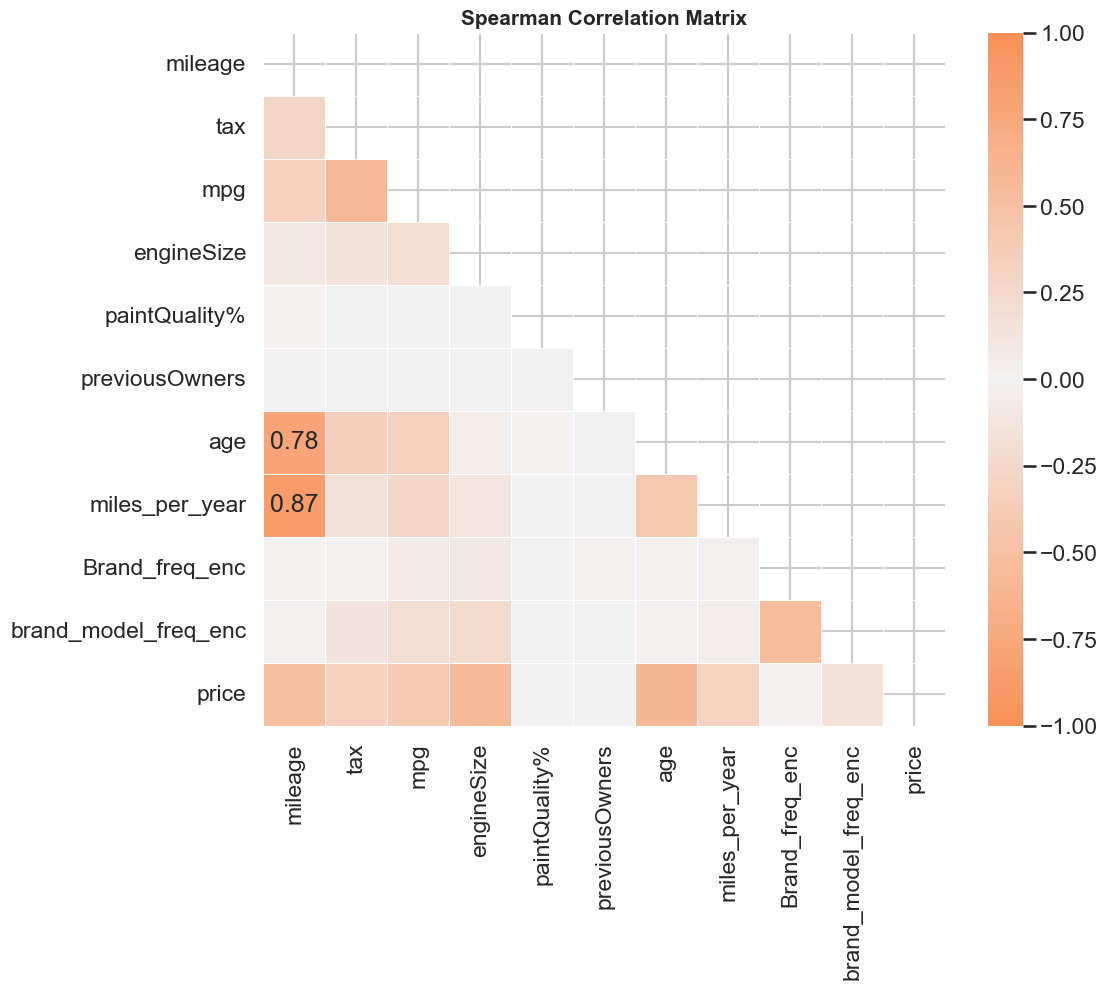

In [89]:
##### Spearman Correlation ####
cor = pd.concat([X_train_filtered, y_train], axis=1).corr(method='spearman').round(2)

# Create a custom diverging colormap based on orange tones
cmap = sns.diverging_palette(h_neg=30, h_pos=30, s=90, l=70, n=256, center="light", as_cmap=True) 

# Create a Mask to hide the upper triangle (to avoid redundancy)
mask = np.zeros_like(cor, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Only show values where absolute correlation is >= 0.6
mask_annot = np.absolute(cor.values) >= 0.6
annot = np.where(mask_annot, cor.values, np.full(cor.shape, ""))

# Plotting
plt.figure(figsize=(11, 9))
sns.heatmap(
    data=cor,
    mask=mask,              # Hide the upper triangle
    cmap=cmap,              # Custom divergent color map
    annot=annot,            # Show annotations only if |value| >= 0.6
    fmt='s',                # Format annotations as strings
    vmin=-1, vmax=1, center=0, # Ensure the scale is from -1 to 1, centered at 0
    linewidths=0.5, 
)

plt.title('Spearman Correlation Matrix', fontsize=15, fontweight='bold')
plt.show()

In [90]:
#NUMÉRCIAS (FREQ.) USASTE VIF PARA MULTICOLINERIDADE, SPEARMAN PARA MULTIC. E RELEVÂNCIA
# OR 

By the rule of thumb, two variables are considered **redundant** when their absolute correlation is **greater than or equal to 0.8**. This is the case for **`mileage`** and **`miles_per_year`**, which is expected since `miles_per_year` was derived from `mileage`. We decided to **drop `mileage`**, as `miles_per_year` captures more information and `mileage` is also **highly correlated with `age`**, which could lead to **multicollinearity issues** if kept in the model.

In [91]:
# look for irrelevant features with |correlation| < 0.1
cor_with_target = cor[y_train.name]
low_corr_features = cor_with_target[abs(cor_with_target) < 0.1].drop(y_train.name, errors='ignore') # Correlation with itself is 1, so we drop it

if not low_corr_features.empty:
    print(f"Found {len(low_corr_features)} variables with absolute correlation < 0.1:")
    # Sort by absolute value to see the least correlated ones first
    print(low_corr_features.abs().sort_values())
else:
    print(f"No variables found with absolute correlation < 0.1 with the target")

Found 3 variables with absolute correlation < 0.1:
paintQuality%     0.00
previousOwners    0.00
Brand_freq_enc    0.01
Name: price, dtype: float64


By the rule of thumb, features with an absolute correlation below **0.1** with the target variable are considered **irrelevant**, as they provide little to no predictive information. In our case, **`paintQuality%`**, **`previousOwners`**, and **`Brand_freq_enc`** show correlations below this threshold, indicating that they are unlikely to contribute meaningfully to the model’s performance and can therefore be **discarded**.

In [92]:
# # Drop columns with high correlation with other variables (|correlation| >= 0.8) or low correlation with target (|correlation| < 0.1) 
# corr_drop = ['paintQuality%','previousOwners', 'Brand_freq_enc','mileage'] 
# for d in [X_train, X_val , X_test]:
#     d.drop(columns=corr_drop, errors='ignore', inplace=True)

##### **Statistical Hypothesis Testing** 

#The variables 'Brand' and 'transmission' are NOT independent (they are REDUNDANT)
#The variables 'Brand' and 'fuelType' are NOT independent (they are REDUNDANT)
#The variables 'Brand' and 'brand_model' are NOT independent (they are REDUNDANT)
#The variables 'transmission' and 'fuelType' are NOT independent (they are REDUNDANT)
#The variables 'transmission' and 'brand_model' are NOT independent (they are REDUNDANT)
#The variables 'fuelType' and 'brand_model' are NOT independent (they are REDUNDANT)

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.11.2 |  Wrapper Methods</b></span>
    </h1>
</div>

##### **RFE** 

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">
BASEADO NO CÓDIGO DAS AULAS MAS GENERALIZADO <BR>
ONDE A FITNESS É MAE 

In [93]:
def find_optimal_features_rfe(model, X_train, y_train, X_val, y_val):
    nof_list = np.arange(1, len(X_train.columns) + 1)
    low_score = float('inf')  # Start with an infinite value to find the minimum
    nof = 0
    train_score_list = []
    val_score_list = []

    print(f"Running RFE with model: {model.__class__.__name__}")

    for n in nof_list:
        # Use clone to ensure the model is "clean" in each iteration
        estimator = clone(model)
        
        rfe = RFE(estimator=estimator, n_features_to_select=n)
        X_train_rfe = rfe.fit_transform(X_train, y_train)
        X_val_rfe = rfe.transform(X_val)

        # Train the final model with the selected features
        estimator.fit(X_train_rfe, y_train)
        
        # Store the MAE scores
        train_pred = estimator.predict(X_train_rfe)
        train_mae = mean_absolute_error(y_train, train_pred)
        train_score_list.append(train_mae)
        
        val_pred = estimator.predict(X_val_rfe)
        val_mae = mean_absolute_error(y_val, val_pred)
        val_score_list.append(val_mae)

        # Check for the lowest validation error
        if val_mae <= low_score:
            low_score = val_mae
            nof = n

    print(f"Optimal number of features: {nof} with a validation MAE of {low_score:.4f}")

    # Train the final model with the optimal number of features to get the final feature list
    final_rfe = RFE(estimator=clone(model), n_features_to_select=nof)
    final_rfe.fit(X_train, y_train)
    selected_features_names = X_train.columns[final_rfe.support_].tolist()

    # Return all useful results
    return {
        'optimal_n': nof,
        'best_score': low_score,
        'selected_features': selected_features_names,
        'train_scores': train_score_list,
        'val_scores': val_score_list
    }

In [94]:
# RFE with Linear Regression optimized for MAE
lr_model = LinearRegression()
rfe_results_lr = find_optimal_features_rfe(lr_model, X_train, y_train, X_val, y_val)
print(f"Características Selecionadas ({rfe_results_lr['optimal_n']}): {rfe_results_lr['selected_features']}\n")


# RFE with RandomForest Regressor optimized for MAE
rf_model = RandomForestRegressor(n_estimators=50, random_state=37, n_jobs=-1)
rfe_results_rf = find_optimal_features_rfe(rf_model, X_train, y_train, X_val, y_val)
print(f"Características Selecionadas ({rfe_results_rf['optimal_n']}): {rfe_results_rf['selected_features']}")

Running RFE with model: LinearRegression
Optimal number of features: 15 with a validation MAE of 3498.6600
Características Selecionadas (15): ['mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'age', 'miles_per_year', 'Brand_freq_enc', 'brand_model_freq_enc', 'transmission_manual', 'transmission_semi auto', 'transmission_unknown', 'fuelType_hybrid', 'fuelType_petrol', 'fuelType_unknown']

Running RFE with model: RandomForestRegressor
Optimal number of features: 7 with a validation MAE of 1464.2918
Características Selecionadas (7): ['mileage', 'mpg', 'engineSize', 'age', 'Brand_freq_enc', 'brand_model_freq_enc', 'transmission_manual']


<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.11.3 |  Embedded Methods</b></span>
    </h1>
</div>


- **Regularization methods**: These methods add a penalty term to the model's loss function that discourages the model from using too many features. Examples include Lasso (L1 regularization - which mmakes the weights of unimportant variables actually reach 0) and Ridge (L2 regularization - whose weights assymptotically tend to 0 - but do not reach it).

- **Tree-based methods**: These methods use decision trees to calculate feature importance based on how much each feature contributes to reducing the impurity of the tree. Examples include Random Forest and Gradient Boosting.

In [95]:
# ---  Lasso Regularization (L1) ---
lasso_model = Lasso(alpha=1.0, random_state=37, max_iter=10000)

# Treinar o modelo apenas com os dados de treino
lasso_model.fit(X_train, y_train)

# Obter os coeficientes e selecionar as características com coeficientes não-nulos
lasso_coefs = pd.Series(lasso_model.coef_, index=X_train.columns)
selected_features_lasso = lasso_coefs[lasso_coefs != 0].index.tolist()

print(f"\nNúmero de características selecionadas pelo Lasso: {len(selected_features_lasso)}")
print(f"Características Selecionadas: {selected_features_lasso}")

# Mostrar as características mais importantes (com base na magnitude do coeficiente)
print("\nImportância das características (Lasso):")
print(abs(lasso_coefs).sort_values(ascending=False).head(20)) # Mostra as 20 mais importantes


# --- 2. Ridge Regularization (L2) com Alpha Fixo ---

print("\n\n" + "="*50)
print("--- Análise de Importância com Ridge (alpha=1.0) ---")

# Instanciar o modelo com um alpha fixo
ridge_model = Ridge(alpha=1.0, random_state=37)

# Treinar o modelo apenas com os dados de treino
ridge_model.fit(X_train, y_train)

# Obter os coeficientes. Ridge não zera os coeficientes, mas a sua magnitude
# indica a importância da característica para o modelo.
ridge_coefs = pd.Series(ridge_model.coef_, index=X_train.columns)

print("\nImportância das características (magnitude dos coeficientes do Ridge):")
# Como Ridge não seleciona (não zera coeficientes), mostramos a importância de todas, ordenadas
print(abs(ridge_coefs).sort_values(ascending=False).head(20)) # Mostra as 20 mais importantes


Número de características selecionadas pelo Lasso: 16
Características Selecionadas: ['mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'age', 'miles_per_year', 'Brand_freq_enc', 'brand_model_freq_enc', 'transmission_manual', 'transmission_semi auto', 'transmission_unknown', 'fuelType_hybrid', 'fuelType_petrol', 'fuelType_unknown']

Importância das características (Lasso):
engineSize                7459.116625
age                       4793.709645
transmission_manual       3822.464268
transmission_unknown      1931.221258
fuelType_hybrid           1705.134959
mileage                   1528.247813
transmission_semi auto    1009.069953
mpg                        778.430326
Brand_freq_enc             617.784609
miles_per_year             571.508131
fuelType_petrol            418.206939
fuelType_unknown           410.616188
brand_model_freq_enc       211.087406
tax                         56.745540
paintQuality%               53.789674
previousOwners               2

In [98]:
# # Get absolute coefficients as feature importance for selected features
# # Only include features with non-zero coefficients
# feature_importance = np.abs(model.coef_)[model.coef_ != 0]

# # Create a DataFrame to pair selected features with their importance values
# importance_df = pd.DataFrame({
#     'Feature': selected_features_lasso,
#     'Importance': feature_importance
# })

# # Sort by importance
# importance_df = importance_df.sort_values(by='Importance', ascending=False)

# # Create a horizontal bar plot for feature importances
# plt.figure(figsize=(10, 6))
# bars = plt.barh(importance_df['Feature'], importance_df['Importance'])

# # Add importance values as labels on the bars
# for bar in bars:
#     plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
#              f'{bar.get_width():.2f}', va='center', ha='left', fontsize=10)

# # Label the axes and set the title
# plt.xlabel('Importance (Absolute Coefficient)')
# plt.ylabel('Feature')
# plt.title('Feature Importance from Lasso Regression')

# # Show the plot
# plt.show()

Nós decidimos ficar com as variáveis que fossem recomendadas por pelo menos 3 dos 4 métodos usados (Spearman, RFE com Regressão Logística, RFE com SVM e Lasso). A tabela seguinte resume as decisões tomadas para cada variável:

CHI-SQUARED:
The variables 'Brand' and 'model' are NOT independent (they are REDUNDANT)     
The variables 'Brand' and 'transmission' are NOT independent (they are REDUNDANT)      
The variables 'Brand' and 'fuelType' are NOT independent (they are REDUNDANT)      
The variables 'Brand' and 'brand_model' are NOT independent (they are REDUNDANT)      
The variables 'Brand' and 'hasDamage' are INDEPENDENT (they are NOT redundant)     
The variables 'model' and 'transmission' are NOT independent (they are REDUNDANT)     
The variables 'model' and 'fuelType' are NOT independent (they are REDUNDANT)     
The variables 'model' and 'brand_model' are NOT independent (they are REDUNDANT)     
The variables 'model' and 'hasDamage' are INDEPENDENT (they are NOT redundant)      
The variables 'transmission' and 'fuelType' are NOT independent (they are REDUNDANT)     
The variables 'transmission' and 'brand_model' are NOT independent (they are REDUNDANT)     
The variables 'transmission' and 'hasDamage' are INDEPENDENT (they are NOT redundant)    
The variables 'fuelType' and 'brand_model' are NOT independent (they are REDUNDANT)    
The variables 'fuelType' and 'hasDamage' are INDEPENDENT (they are NOT redundant)    
The variables 'brand_model' and 'hasDamage' are INDEPENDENT (they are NOT redundant)    


| Predictor            | Spearman  |RFE LR   | RFE RF   | aaaa     | Lasso    | What to do? | 
| ---                  | ---       |  ---    |   ---    |    ---   |  ---     |   ---       |
| mileage              |  -        | Discard | Keep?    |Keep      | Keep     |             |  
| tax                  |-          |         |          |          |          |             |
| mpg                  |-          |         |          |          |          |             |
| engineSize           |-          |         |          |          |          |             |
| paintQuality%        |-          |         |          |          |          |             |
| previousOwners       |-          |         |          |          |          |             |
| age                  |-          |         |          |          |          |             |
| miles_per_year       |-          |         |          |          |          |             |
| Brand_freq_enc       |-          |         |          |          |          |             |
| brand_model_freq_enc |-          |         |          |          |          |             |
|transmission_manual   |-          |         |          |          |          |             |
|transmission_other    |-          |         |          |          |          |             |
|transmission_semi auto|-          |         |          |          |          |             |
|transmission_unknown  |-          |         |          |          |          |             |
|fuelType_electric     |-          |         |          |          |          |             |
|fuelType_hybrid       |-          |         |          |          |          |             |
|fuelType_other        |-          |         |          |          |          |             |
|fuelType_petrol       |-          |         |          |          |          |             |
|fuelType_unknown      |-          |         |          |          |          |             |
<hr>

# <span style="color: #ffffff;">3 | Regression Benchmarking</span>

<div style="background-color:#e5c120ff; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px rgba(227, 167, 108, 1);">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: #644712ff;"><b>3 | Regression Benchmarking</b></span>
    </h1>
</div>

<br>
<div style="background-color:#e4b3c2ff; border:1.5px solid #e4b3c2ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">
PASSOS A SEGUIR: <BR>
- Explanation of model assessment strategy and metrics used
- Feature Selection Strategy and results
- Comparison of performance between candidate models
<br><br>
 - Identify the type of problem and select the relevant algorithms.
 - Select one model assessment strategy to use throughout your work. Which metrics are you using to evaluate your model and why?
 - Train at least 1 model using the train dataset and obtain predictions for the test dataset.(Extra 1 point) Be on the Top-5 Best Groups in the Kaggle Competition
</div>


We are dealing with a **supervised regression problem**, as the target variable `price` is **numerical and continuous**. The goal is to train a model that learns the relationship between car characteristics (`Brand`, `model`, `mileage`, `year`, ...) and `price`, allowing it to predict the value of unseen cars.

Both **linear models** (e.g., *Linear Regression*, *Ridge*, *ElasticNet*) and **non-linear models** (e.g., *KNN*, *Decision Tree*, *SVR*) can be applied. In this problem, we focus on predicting the **median price** because car prices often include **outliers or extreme values** that could skew mean-based predictions. The **median is robust** to such extremes, providing more reliable predictions for typical cars.

For this reason, **median-based loss functions** such as *MAE* (Mean Absolute Error) or *Pinball Loss* with α = 0.5 are most appropriate, as they are **strictly consistent for the median functional**. We will use *MAE* as the primary metric, in line with the Kaggle competition, while monitoring other metrics to track overall model performance.




<div style="background-color:#e4b3c2ff; border:1.5px solid #e4b3c2ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

O STOR DISSE QUE UM DOS PASSOS MAIS ESSENCIAIS É ESCOLHER BEM A **FITNESS F.**:    
O AI DEU-ME ISTO:

**Huber Loss** (A escolha padrão e mais recomendada):<BR>
Como funciona: É um híbrido. Para erros pequenos, comporta-se como o Erro Quadrático Médio (MSE), sendo eficiente. Para erros grandes (causados por outliers), comporta-se como o Erro Absoluto Médio (MAE), sendo robusto.
Como usar: Use modelos que a implementam diretamente, como HuberRegressor em scikit-learn.

**Erro Absoluto Médio** (MAE ou L1 Loss):<BR>
Como funciona: Penaliza o erro linearmente, não quadraticamente. Um outlier tem uma influência proporcional, não desproporcional.
Como usar: Use modelos como Lasso ou SGDRegressor(loss='epsilon_insensitive').

- TEMOS QUE USAR A MEDIDA QUE O PROF DIZ LÁ NO KAAGLE QUE NOS VAI AVALIAR MAS AS OUTRAS TEMOS DE TER UMA BOA JUSTIFICAÇÃO E NÃO USAR R^2 PORQUE É TIPO A PIOR MEDIDA!!!

DIZER PORQUÊ QUE UM MODELO É MELHOR COM OUTRO EM TERMOS DE PERFORMANCE

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_pinball_loss 
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


# --- 2. Atualização da Função de Avaliação ---
def evaluate_model(model, X_train, y_train, X_val, y_val):
    """
    Calcula MAE, RMSE e Pinball Loss (α=0.5) para os conjuntos de treino e validação.
    """
    # Previsões
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Métricas atualizadas
    scores = {
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Val MAE': mean_absolute_error(y_val, y_val_pred),
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Val RMSE': np.sqrt(mean_squared_error(y_val, y_val_pred)),
        'Train Pinball (α=0.5)': mean_pinball_loss(y_train, y_train_pred, alpha=0.5),
        'Val Pinball (α=0.5)': mean_pinball_loss(y_val, y_val_pred, alpha=0.5)
    }
    return scores

# --- 3. Definição dos Modelos e Grelhas de Hiperparâmetros ---
# (Esta secção permanece a mesma)
models_and_grids = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}
    },
    "ElasticNet": {
        "model": ElasticNet(random_state=37),
        "params": {
            'alpha': [0.1, 1.0, 10.0],
            'l1_ratio': [0.1, 0.5, 0.9]
        }
    },
    "SVR": {
        "model": SVR(),
        "params": {
            'kernel': ['rbf'],
            'C': [1, 10, 100],
            'gamma': ['scale', 'auto']
        }
    },
    "Decision Tree": {
        "model": DecisionTreeRegressor(random_state=37),
        "params": {
            'max_depth': [5, 10, None],
            'min_samples_leaf': [2, 5]
        }
    },
    "Random Forest": {
        "model": RandomForestRegressor(random_state=37, n_jobs=-1),
        "params": {
            'n_estimators': [100],
            'max_depth': [10, 20],
            'min_samples_leaf': [2, 4, 6]
        }
    },
    "K-Neighbors": {
        "model": KNeighborsRegressor(n_jobs=-1),
        "params": {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    }
}


# --- 4. Execução do Treino e Avaliação ---

results_list = []
from sklearn.model_selection import ParameterGrid

# Iterar sobre cada modelo
for model_name, config in models_and_grids.items():
    print(f"--- A processar o modelo: {model_name} ---")
    param_grid = ParameterGrid(config['params'])
    best_model_results = None
    best_val_mae = float('inf')

    # Para Linear Regression que não tem grid
    if not list(param_grid):
        model = config['model']
        # Treinar diretamente com X_train
        model.fit(X_train, y_train)
        scores = evaluate_model(model, X_train, y_train, X_val, y_val)
        best_model_results = {
            'Model': model_name,
            'Best Params': '{}',
            **scores
        }
    else:
        # Iterar sobre cada combinação de hiperparâmetros
        for params in param_grid:
            model = config['model']
            model.set_params(**params)
            
            # Treinar o modelo diretamente com X_train
            model.fit(X_train, y_train)
            
            # Avaliar o modelo com a nova função
            scores = evaluate_model(model, X_train, y_train, X_val, y_val)
            
            print(f"  Params: {params} -> Val MAE: {scores['Val MAE']:.4f}")
            
            if scores['Val MAE'] < best_val_mae:
                best_val_mae = scores['Val MAE']
                best_model_results = {
                    'Model': model_name,
                    'Best Params': str(params),
                    **scores
                }
    
    results_list.append(best_model_results)
    print(f"Melhor MAE de validação para {model_name}: {best_val_mae:.4f}\n")


# --- 5. Apresentação dos Resultados ---

results_df = pd.DataFrame(results_list)
results_df = results_df.sort_values(by='Val MAE', ascending=True)

# Reordenar colunas para melhor visualização, com as novas métricas
columns_order = [
    'Model', 'Val MAE', 'Train MAE', 'Val RMSE', 'Train RMSE', 
    'Val Pinball (α=0.5)', 'Train Pinball (α=0.5)', 'Best Params'
]
results_df = results_df[columns_order]

print("\n\n" + "="*25 + " RESULTADOS FINAIS " + "="*25)
display(results_df)

--- A processar o modelo: Linear Regression ---
  Params: {} -> Val MAE: 3498.6906
Melhor MAE de validação para Linear Regression: 3498.6906

--- A processar o modelo: ElasticNet ---
  Params: {'alpha': 0.1, 'l1_ratio': 0.1} -> Val MAE: 3526.6851
  Params: {'alpha': 0.1, 'l1_ratio': 0.5} -> Val MAE: 3504.9925
  Params: {'alpha': 0.1, 'l1_ratio': 0.9} -> Val MAE: 3496.3244
  Params: {'alpha': 1.0, 'l1_ratio': 0.1} -> Val MAE: 4484.5147
  Params: {'alpha': 1.0, 'l1_ratio': 0.5} -> Val MAE: 4030.0896
  Params: {'alpha': 1.0, 'l1_ratio': 0.9} -> Val MAE: 3533.7366
  Params: {'alpha': 10.0, 'l1_ratio': 0.1} -> Val MAE: 6263.2653
  Params: {'alpha': 10.0, 'l1_ratio': 0.5} -> Val MAE: 5913.6497
  Params: {'alpha': 10.0, 'l1_ratio': 0.9} -> Val MAE: 4582.0816
Melhor MAE de validação para ElasticNet: 3496.3244

--- A processar o modelo: SVR ---


In [ ]:
# # Model definitions
# models = {
#     "LinearRegression": LinearRegression(),
#     "Ridge": Ridge(),
#     "Lasso": Lasso(),
#     "RandomForest": RandomForestRegressor(),
#     "DecisionTree": DecisionTreeRegressor(),
#     "KNeighbors": KNeighborsRegressor()
# }

# # Dictionary to store results
# results = {}

# # Iterate over each model
# for model_name, model in models.items():
#     print(f"Training {model_name}...")

#     # Train the model
#     model.fit(X_train, y_train)

#     # Predictions
#     y_train_pred = model.predict(X_train)
#     y_val_pred   = model.predict(X_val)

#     # Calculate metrics
#     mae_train = mean_absolute_error(y_train, y_train_pred)
#     mae_val   = mean_absolute_error(y_val, y_val_pred)
#     rmse_val  = np.sqrt(mean_squared_error(y_val, y_val_pred))
#     r2_val    = r2_score(y_val, y_val_pred)

#     # Store results
#     results[model_name] = {
#         "MAE_train": mae_train,
#         "MAE_val": mae_val
#     }

#     # Print results
#     print(f"{model_name} — MAE (train): {mae_train:.4f}, MAE (val): {mae_val:.4f}")
#     print("-" * 60)

# # Summary table
# results_df = pd.DataFrame(results).T
# display(results_df)


Training LinearRegression...


ValueError: Found input variables with inconsistent numbers of samples: [15191, 15193]

In [ ]:
#VER HIPERPARÂMETROS
# NO FIM TREINAR COM TODO TRAIN E VALIDATION E TER VALORES DO TEST